# ***Systems Biology Final Project***

--- Poorvi HC and Prakul Agrawal

## Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Simulating the model of the paper

Our simplified network can be represented as:

![Network Model](./images/model1.png)

The main equation that we have is as follows:

![Rate Equation](./images/rate1.png)

The idea is to equate this to 0 to get the steady state

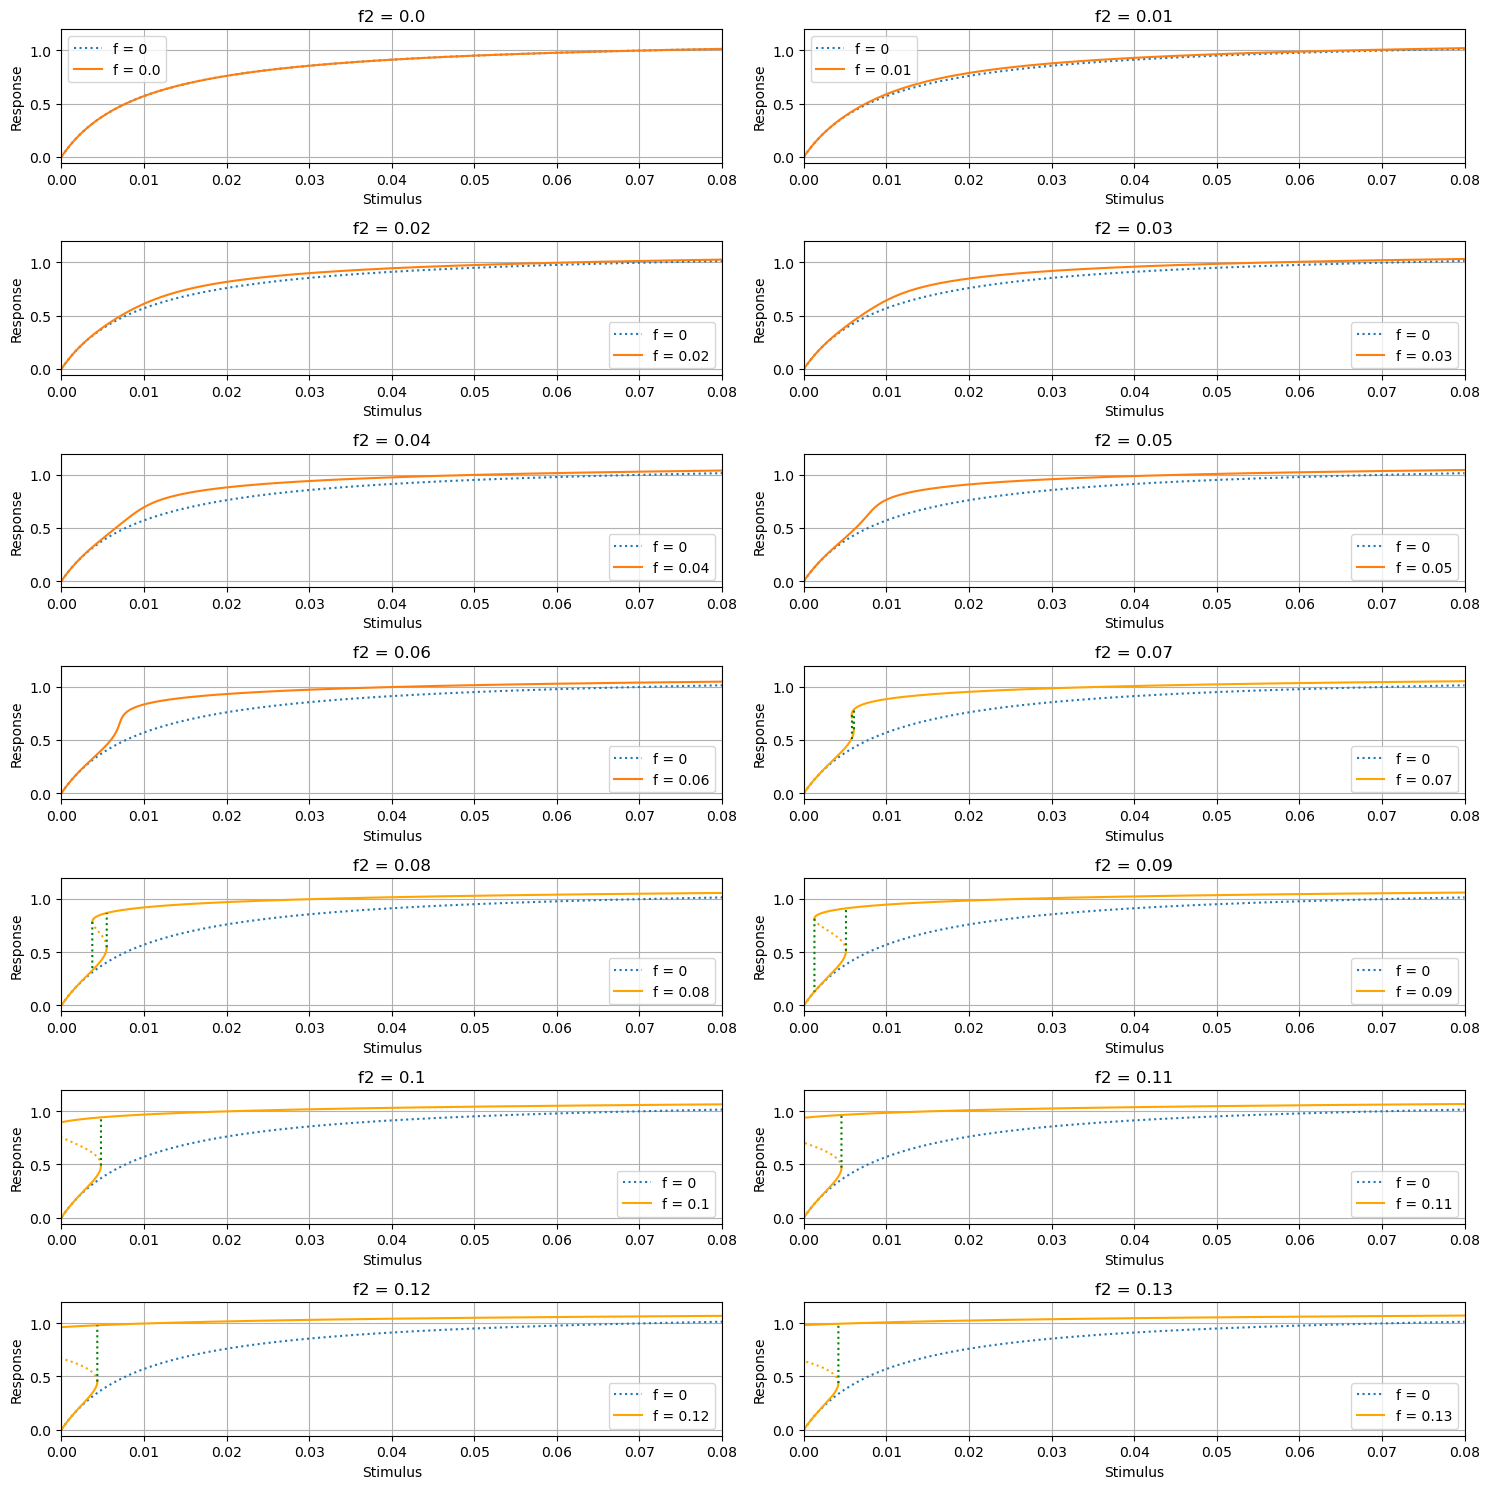

In [2]:
f1 = 0  # set to 0 to get curve without feedback
A_tot = 1.14  # total conc of A
k_in = 0.01  # degradation constant
n = 5  # hill function constant
K = 1.0  # hill function constant
resolution = 100000  # resolution of graph

A_values = np.linspace(0.0, A_tot - 0.0001, resolution)

f2_values = np.linspace(0.00, 0.13, 14)

num_cols = 2
num_rows = len(f2_values) // num_cols + len(f2_values) % num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, f2 in enumerate(f2_values):
    stimulus_values1 = (f1 * A_values**n * A_tot - k_in * K**n * A_values - (f1 + k_in) * A_values**(n + 1)) / ((A_values - A_tot) * (A_values**n + K**n))
    stimulus_values2 = (f2 * A_values**n * A_tot - k_in * K**n * A_values - (f2 + k_in) * A_values**(n + 1)) / ((A_values - A_tot) * (A_values**n + K**n))

    derivative_values = np.gradient(stimulus_values2, A_values)

    zero_slope_indices = np.where(np.diff(np.sign(derivative_values)))[0]

    stimulus_value_at_zero_slope = stimulus_values2[zero_slope_indices]

    min_diff = 1000
    index0 = -1
    if len(zero_slope_indices) >= 1:
        for j in range(zero_slope_indices[0] + resolution // 10, len(stimulus_values2)):
            if abs(stimulus_values2[j] - stimulus_value_at_zero_slope[0]) < min_diff:
                min_diff = abs(stimulus_values2[j] - stimulus_value_at_zero_slope[0])
                index0 = j

    min_diff = 1000
    index1 = -1
    if len(zero_slope_indices) >= 2:
        for j in range(zero_slope_indices[1] - resolution // 10, -1, -1):
            if abs(stimulus_values2[j] - stimulus_value_at_zero_slope[1]) < min_diff:
                min_diff = abs(stimulus_values2[j] - stimulus_value_at_zero_slope[1])
                index1 = j

    row = i // num_cols
    col = i % num_cols

    axes[row, col].plot(stimulus_values1, A_values, linestyle='dotted', label=f'f = {f1}')
    if index0 != -1 and index1 != -1:
        axes[row, col].plot(stimulus_values2[0:zero_slope_indices[0]], A_values[0:zero_slope_indices[0]], label=f'f = {f2}', color='orange')
        axes[row, col].plot(stimulus_values2[zero_slope_indices[0]:zero_slope_indices[1]], A_values[zero_slope_indices[0]:zero_slope_indices[1]], color='orange', linestyle='dotted')
        axes[row, col].plot(stimulus_values2[zero_slope_indices[1]:], A_values[zero_slope_indices[1]:], color='orange')
    else:
        axes[row, col].plot(stimulus_values2, A_values, label=f'f = {f2}')
    if index0 != -1:
        axes[row, col].plot([stimulus_values2[zero_slope_indices[0]], stimulus_values2[index0]], [A_values[zero_slope_indices[0]], A_values[index0]], color='green', linestyle='dotted')
    if index1 != -1:
        axes[row, col].plot([stimulus_values2[zero_slope_indices[1]], stimulus_values2[index1]], [A_values[zero_slope_indices[1]], A_values[index1]], color='green', linestyle='dotted')

    axes[row, col].set_xlabel('Stimulus')
    axes[row, col].set_ylabel('Response')
    axes[row, col].set_title(f'f2 = {f2}')
    axes[row, col].grid(True)
    axes[row, col].set_xlim(0, 0.08)
    axes[row, col].legend()

plt.tight_layout()
plt.show()


Here, we have plotted the Response (the steady state of A*) vs the applied Stimulus

The factor <b>" f "</b> controls the strength of the positive feedback.

We have plotted the line for 'No Feedback' as a comparison in all the plots.

When Hysteresis takes place, we have shown the jumps with the dotted green lines. We have also shown the unstable steady state positions with the dotted orange line 

## Further Analysis

### Demonstrating Irreversibility and System's Memory

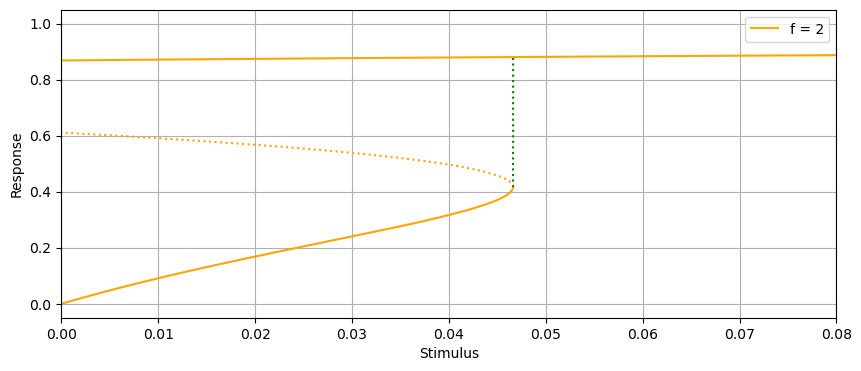

In [3]:
f1 = 0  # set to 0 to get curve without feedback
f2 = 2 # strength of feedback
A_tot = 1.0  # total conc of A
k_in = 0.1  # degradation constant
n = 5  # hill function constant
K = 1.0  # hill function constant
resolution = 100000  # resolution of graph

A_values = np.linspace(0.0, A_tot - 0.0001, resolution)

stimulus_values2 = (f2 * A_values**n * A_tot - k_in * K**n * A_values - (f2 + k_in) * A_values**(n + 1)) / ((A_values - A_tot) * (A_values**n + K**n))

derivative_values = np.gradient(stimulus_values2, A_values)

zero_slope_indices = np.where(np.diff(np.sign(derivative_values)))[0]

stimulus_value_at_zero_slope = stimulus_values2[zero_slope_indices]

min_diff = 1000
index0 = -1
if len(zero_slope_indices) >= 1:
    for i in range(zero_slope_indices[0] + resolution // 10, len(stimulus_values2)):
        if abs(stimulus_values2[i] - stimulus_value_at_zero_slope[0]) < min_diff:
            min_diff = abs(stimulus_values2[i] - stimulus_value_at_zero_slope[0])
            index0 = i
            
min_diff = 1000
index1 = -1
if len(zero_slope_indices) >= 2:
    for i in range(zero_slope_indices[1] - resolution // 10, -1, -1):
        if abs(stimulus_values2[i] - stimulus_value_at_zero_slope[1]) < min_diff:
            min_diff = abs(stimulus_values2[i] - stimulus_value_at_zero_slope[1])
            index1 = i

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)

if index0 != -1 and index1 != -1:
    plt.plot(stimulus_values2[0:zero_slope_indices[0]], A_values[0:zero_slope_indices[0]], label=f'f = {f2}', color='orange')
    plt.plot(stimulus_values2[zero_slope_indices[0]:zero_slope_indices[1]], A_values[zero_slope_indices[0]:zero_slope_indices[1]], color='orange', linestyle='dotted')
    plt.plot(stimulus_values2[zero_slope_indices[1]:], A_values[zero_slope_indices[1]:], color='orange')
else:
    plt.plot(stimulus_values2, A_values, label=f'f = {f2}')

if index0 != -1:
    plt.plot([stimulus_values2[zero_slope_indices[0]], stimulus_values2[index0]], [A_values[zero_slope_indices[0]], A_values[index0]], color='green', linestyle='dotted')
if index1 != -1:
    plt.plot([stimulus_values2[zero_slope_indices[1]], stimulus_values2[index1]], [A_values[zero_slope_indices[1]], A_values[index1]], color='green', linestyle='dotted')

plt.xlabel('Stimulus')
plt.ylabel('Response')
plt.grid(True)
plt.xlim(0, 0.08)
plt.legend()
plt.show()

You can clearly see in this plot, how after the stimulus crosses a certain threshold, the steady state jumps to a higher value. Now, even when the stimulus is removed, the response remains and it simply follows the path of the upper orange line back to value of about 0.88

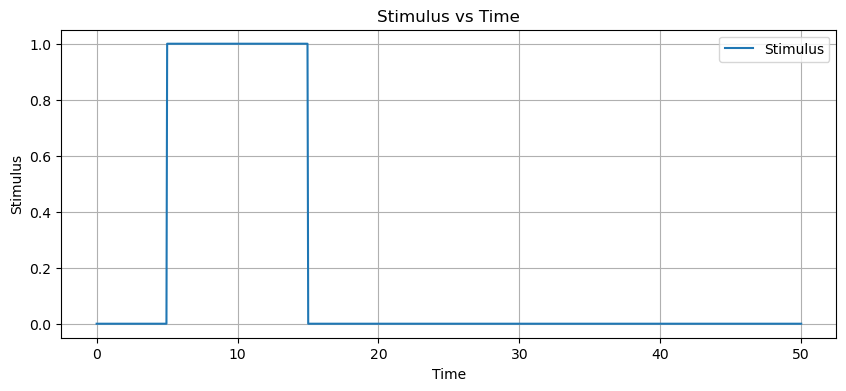

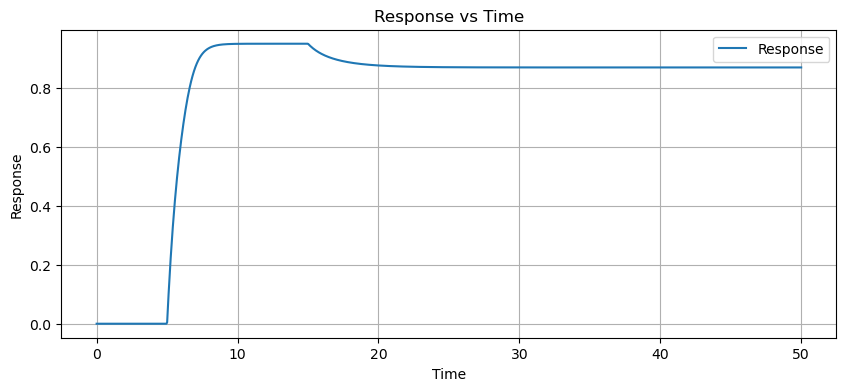

In [4]:
def model(A, t, A_total, f, n, K, k_inact):
    if t < 5 or t > 15:
        stimulus = 0
    else:
        stimulus = 1
    dAdt = stimulus * (A_total - A) + f * (A**n / (K**n + A**n)) * (A_total - A) - k_inact * A
    return dAdt

A_total = 1.0
f = 2
n = 5
K = 1.0
k_inact = 0.1

t = np.linspace(0, 50, 1000)

A0 = np.array([0.0])

A = odeint(model, A0, t, args=(A_total, f, n, K, k_inact))

stimulus = np.zeros_like(t)
stimulus[(t >= 5) & (t <= 15)] = 1

plt.figure(figsize=(10, 4))
plt.plot(t, stimulus, label='Stimulus')
plt.xlabel('Time')
plt.ylabel('Stimulus')
plt.title('Stimulus vs Time')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t, A[:, 0], label='Response')
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Response vs Time')
plt.grid(True)
plt.legend()
plt.show()

As you can see, we give an Stimulus pulse to the system. With the help of this pulse, the Response rises to a steady state value. The interesting thing to note is that when the signal is removed, due to the presence of strong positive feedback, the response almost remains the same (it again stabilises at around 0.88 after decreasing slightly). This shows the irreversibility of the activation. It also shows how the system retains memory.

### Demonstrating Hysteresis and the Different Path followed by Response

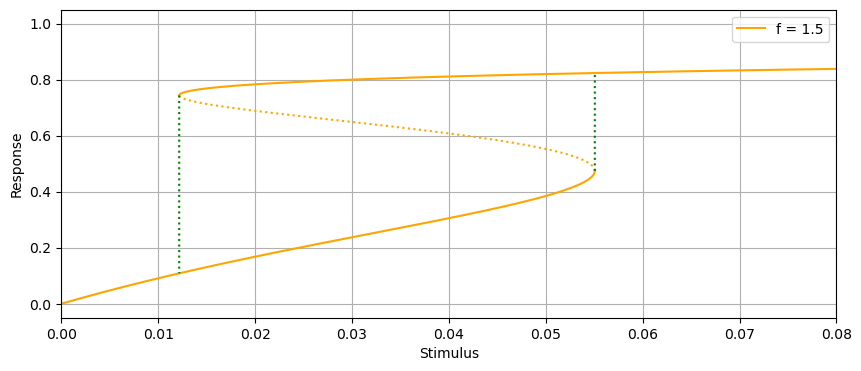

In [5]:
f1 = 0  # set to 0 to get curve without feedback
f2 = 1.5 # strength of feedback
A_tot = 1.0  # total conc of A
k_in = 0.1  # degradation constant
n = 5  # hill function constant
K = 1.0  # hill function constant
resolution = 100000  # resolution of graph

A_values = np.linspace(0.0, A_tot - 0.0001, resolution)

stimulus_values2 = (f2 * A_values**n * A_tot - k_in * K**n * A_values - (f2 + k_in) * A_values**(n + 1)) / ((A_values - A_tot) * (A_values**n + K**n))

derivative_values = np.gradient(stimulus_values2, A_values)

zero_slope_indices = np.where(np.diff(np.sign(derivative_values)))[0]

stimulus_value_at_zero_slope = stimulus_values2[zero_slope_indices]

min_diff = 1000
index0 = -1
if len(zero_slope_indices) >= 1:
    for i in range(zero_slope_indices[0] + resolution // 10, len(stimulus_values2)):
        if abs(stimulus_values2[i] - stimulus_value_at_zero_slope[0]) < min_diff:
            min_diff = abs(stimulus_values2[i] - stimulus_value_at_zero_slope[0])
            index0 = i
            
min_diff = 1000
index1 = -1
if len(zero_slope_indices) >= 2:
    for i in range(zero_slope_indices[1] - resolution // 10, -1, -1):
        if abs(stimulus_values2[i] - stimulus_value_at_zero_slope[1]) < min_diff:
            min_diff = abs(stimulus_values2[i] - stimulus_value_at_zero_slope[1])
            index1 = i

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)

if index0 != -1 and index1 != -1:
    plt.plot(stimulus_values2[0:zero_slope_indices[0]], A_values[0:zero_slope_indices[0]], label=f'f = {f2}', color='orange')
    plt.plot(stimulus_values2[zero_slope_indices[0]:zero_slope_indices[1]], A_values[zero_slope_indices[0]:zero_slope_indices[1]], color='orange', linestyle='dotted')
    plt.plot(stimulus_values2[zero_slope_indices[1]:], A_values[zero_slope_indices[1]:], color='orange')
else:
    plt.plot(stimulus_values2, A_values, label=f'f = {f2}')

if index0 != -1:
    plt.plot([stimulus_values2[zero_slope_indices[0]], stimulus_values2[index0]], [A_values[zero_slope_indices[0]], A_values[index0]], color='green', linestyle='dotted')
if index1 != -1:
    plt.plot([stimulus_values2[zero_slope_indices[1]], stimulus_values2[index1]], [A_values[zero_slope_indices[1]], A_values[index1]], color='green', linestyle='dotted')

plt.xlabel('Stimulus')
plt.ylabel('Response')
plt.grid(True)
plt.xlim(0, 0.08)
plt.legend()
plt.show()


In this example, we can very clearly see hysteresis happening. Around 0.055 amount of Stimulus, the Response jumps to the other stable steady state. Similarly, now, when it comes back, it jumps back to original stable steady state only close to 0.01 amount of Stimulus.

The dotted orange line in the middle is where the unstable steady state is present.

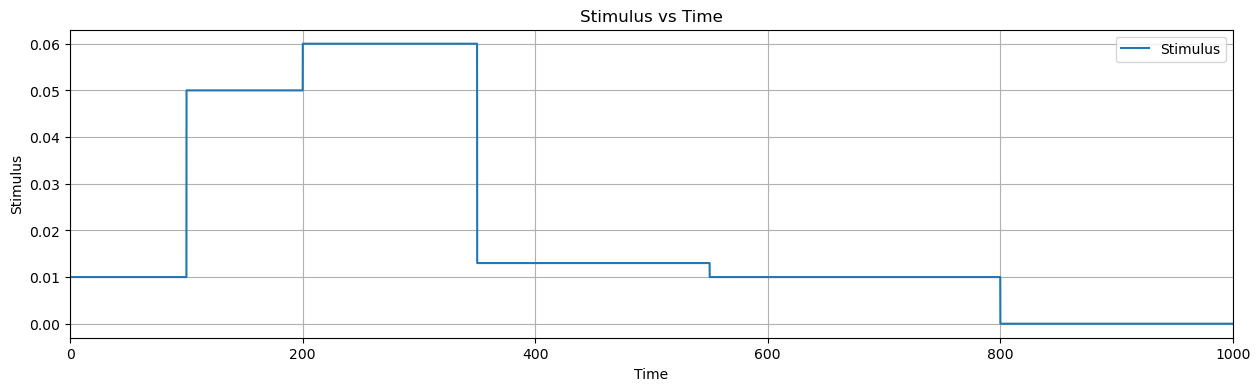

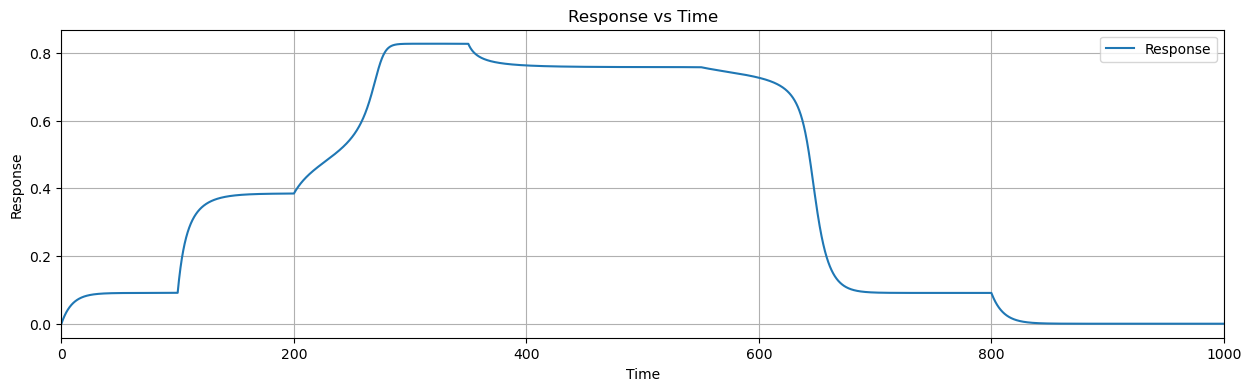

In [6]:
def model(A, t, A_total, f, n, K, k_inact):
    stimulus = 0
    if t < 100:
        stimulus = 0.01
    elif t < 200:
        stimulus = 0.05
    elif t < 350:
        stimulus = 0.06
    elif t < 550:
        stimulus = 0.013
    elif t < 800:
        stimulus = 0.01
    dAdt = stimulus * (A_total - A) + f * (A**n / (K**n + A**n)) * (A_total - A) - k_inact * A
    return dAdt

A_total = 1.0
f = 1.5
n = 5
K = 1.0
k_inact = 0.1

t = np.linspace(0, 1000, 10000)

A0 = np.array([0.0])

A = odeint(model, A0, t, args=(A_total, f, n, K, k_inact))

stimulus = np.zeros_like(t)
stimulus[(t < 100)] = 0.01
stimulus[(t >= 100) & (t < 200)] = 0.05
stimulus[(t >= 200) & (t < 350)] = 0.06
stimulus[(t >= 350) & (t < 550)] = 0.013
stimulus[(t >= 550) & (t < 800)] = 0.01

plt.figure(figsize=(15, 4))
plt.plot(t, stimulus, label='Stimulus')
plt.xlabel('Time')
plt.ylabel('Stimulus')
plt.title('Stimulus vs Time')
plt.grid(True)
plt.xlim(0, 1000)
plt.legend()
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(t, A[:, 0], label='Response')
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Response vs Time')
plt.grid(True)
plt.xlim(0, 1000)
plt.legend()
plt.show()

This plot is to demonstrate how hysteresis is taking place and that our response does not follow the same path back when Stimulus is decreased.

We see how to stimulus rises suddenly after 200 units of Time. That is because we have applied enough Stimulus to shift to the other stable steady state. 

Now the interesting thing to note is that, even though we decrease the stimulus significantly after this, the response does not die down immediately. It does not follow back the same path it followed to reach the current state. It only starts falling after the Stimulus is decreased further to 0.01. Then it finally comes back to the original stable steady state.

This clearly shows the effect of positive feedback loop in creating hysteresis.

### Affect of Concentration of Stimulus on Time Taken to reach Steady State

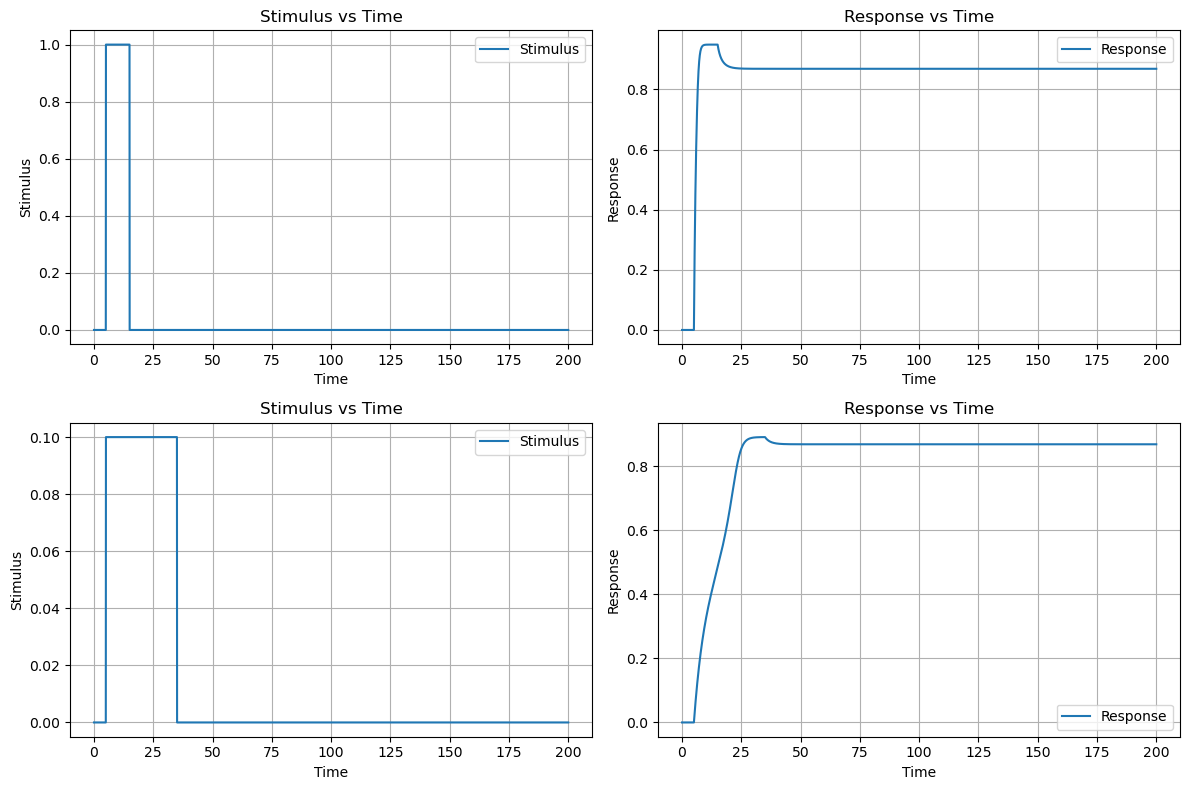

In [7]:
def model(A, t, stimulus, A_total, f, n, K, k_inact, cutoff):
    if t < 5 or t > cutoff:
        stimulus = 0
    dAdt = stimulus * (A_total - A) + f * (A**n / (K**n + A**n)) * (A_total - A) - k_inact * A
    return dAdt

A_total = 1.0
f = 2
n = 5
K = 1.0
k_inact = 0.1

t = np.linspace(0, 200, 10000)

A0 = np.array([0.0])

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

stimulus = 1
cutoff = 15
A = odeint(model, A0, t, args=(stimulus, A_total, f, n, K, k_inact, cutoff))

stimulus_values = np.zeros_like(t)
stimulus_values[(t >= 5) & (t <= cutoff)] = 1

axes[0, 0].plot(t, stimulus_values, label='Stimulus')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Stimulus')
axes[0, 0].set_title('Stimulus vs Time')
axes[0, 0].grid(True)
axes[0, 0].legend()

axes[0, 1].plot(t, A[:, 0], label='Response')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Response')
axes[0, 1].set_title('Response vs Time')
axes[0, 1].grid(True)
axes[0, 1].legend()

stimulus = 0.1
cutoff = 35
A = odeint(model, A0, t, args=(stimulus, A_total, f, n, K, k_inact, cutoff))

stimulus_values = np.zeros_like(t)
stimulus_values[(t >= 5) & (t <= cutoff)] = 0.1

axes[1, 0].plot(t, stimulus_values, label='Stimulus')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Stimulus')
axes[1, 0].set_title('Stimulus vs Time')
axes[1, 0].grid(True)
axes[1, 0].legend()

axes[1, 1].plot(t, A[:, 0], label='Response')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Response')
axes[1, 1].set_title('Response vs Time')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


Here, we have demonstrated how different concentrations of Stimulus affect the time to take for the Response to reach the steady state.

As you can see, both values of Stimulus, 1.0 and 0.1, lead to the same final steady state concentration of the Response. You can observe this by looking at the graph in the section where we showed Irreversibility.

However, the Stimulus value of 1.0 requires a shorter pulse to make the Response reach the steady state, as compared to 0.1, which requires more time.

Hence, a stronger stimulus can help the system reach the steady state or the irreversible state much faster, as compared to a weaker stimulus

### Certain Parameters for Positive Feedback can also give a Switch-like behaviour

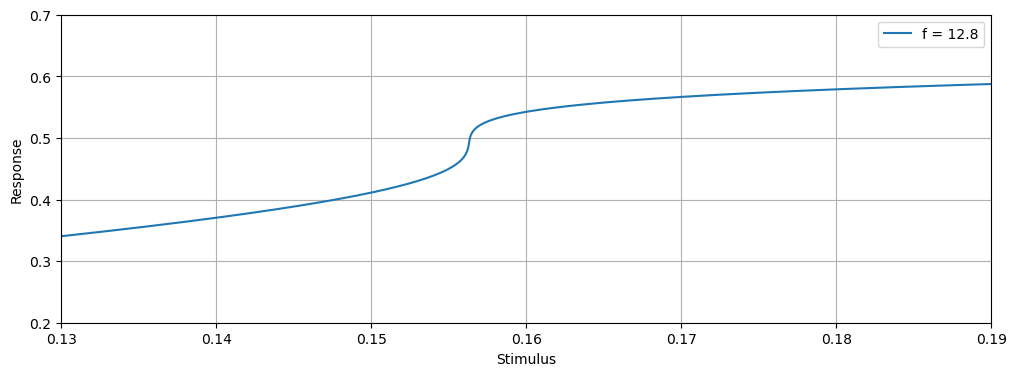

In [8]:
f2 = 12.8 # strength of feedback
A_tot = 0.75  # total conc of A
k_in = 0.2  # degradation constant
n = 5  # hill function constant
K = 1.1  # hill function constant
resolution = 100000  # resolution of graph

A_values = np.linspace(0.0, A_tot - 0.0001, resolution)

stimulus_values2 = (f2 * A_values**n * A_tot - k_in * K**n * A_values - (f2 + k_in) * A_values**(n + 1)) / ((A_values - A_tot) * (A_values**n + K**n))

derivative_values = np.gradient(stimulus_values2, A_values)

zero_slope_indices = np.where(np.diff(np.sign(derivative_values)))[0]

stimulus_value_at_zero_slope = stimulus_values2[zero_slope_indices]

min_diff = 1000
index0 = -1
if len(zero_slope_indices) >= 1:
    for i in range(zero_slope_indices[0] + resolution // 10, len(stimulus_values2)):
        if abs(stimulus_values2[i] - stimulus_value_at_zero_slope[0]) < min_diff:
            min_diff = abs(stimulus_values2[i] - stimulus_value_at_zero_slope[0])
            index0 = i
            
min_diff = 1000
index1 = -1
if len(zero_slope_indices) >= 2:
    for i in range(zero_slope_indices[1] - resolution // 10, -1, -1):
        if abs(stimulus_values2[i] - stimulus_value_at_zero_slope[1]) < min_diff:
            min_diff = abs(stimulus_values2[i] - stimulus_value_at_zero_slope[1])
            index1 = i

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

if index0 != -1 and index1 != -1:
    plt.plot(stimulus_values2[0:zero_slope_indices[0]], A_values[0:zero_slope_indices[0]], label=f'f = {f2}', color='orange')
    plt.plot(stimulus_values2[zero_slope_indices[0]:zero_slope_indices[1]], A_values[zero_slope_indices[0]:zero_slope_indices[1]], color='orange', linestyle='dotted')
    plt.plot(stimulus_values2[zero_slope_indices[1]:], A_values[zero_slope_indices[1]:], color='orange')
else:
    plt.plot(stimulus_values2, A_values, label=f'f = {f2}')

if index0 != -1:
    plt.plot([stimulus_values2[zero_slope_indices[0]], stimulus_values2[index0]], [A_values[zero_slope_indices[0]], A_values[index0]], color='green', linestyle='dotted')
if index1 != -1:
    plt.plot([stimulus_values2[zero_slope_indices[1]], stimulus_values2[index1]], [A_values[zero_slope_indices[1]], A_values[index1]], color='green', linestyle='dotted')

plt.xlabel('Stimulus')
plt.ylabel('Response')
plt.grid(True)
plt.xlim(0.13, 0.19)
plt.ylim(0.2, 0.7)
plt.legend()
plt.show()


For a certain combination of parameters, we see that the positive feedback loop actually causes the graph to appears sigmoidal in nature.

This is different from hysteresis, as the path traced back by the Response will be the same as the one it took to get to a certain value.

However, around the value of 0.156 to 0.157 of Stimulus concentration, the Response suddenly jumps to a higher value from a lower value and vice versa.

The system is ultrasensitive in this region and demonstrates a switch like response.

Hence depending on the system, it can utilise this behaviour of the positive feedback loops as well to meet its requirements.

## Changing the Model - Multi component positive feedback loop

We did further analysis and decided to try combining the concepts of multiple components in the positive feedback loop. This is important to investigate as it most systems, including ours involves a much more complicated feedback system, rather than a two component one.

Our new network can be represented as:

![Network Model](./images/model2.jpeg)

The main equations that we have are as follows:

![Rate Equation](./images/rate2.jpeg)

We use these to obtain our observations

### Demonstrating the presence of Irreversibility in this model as well

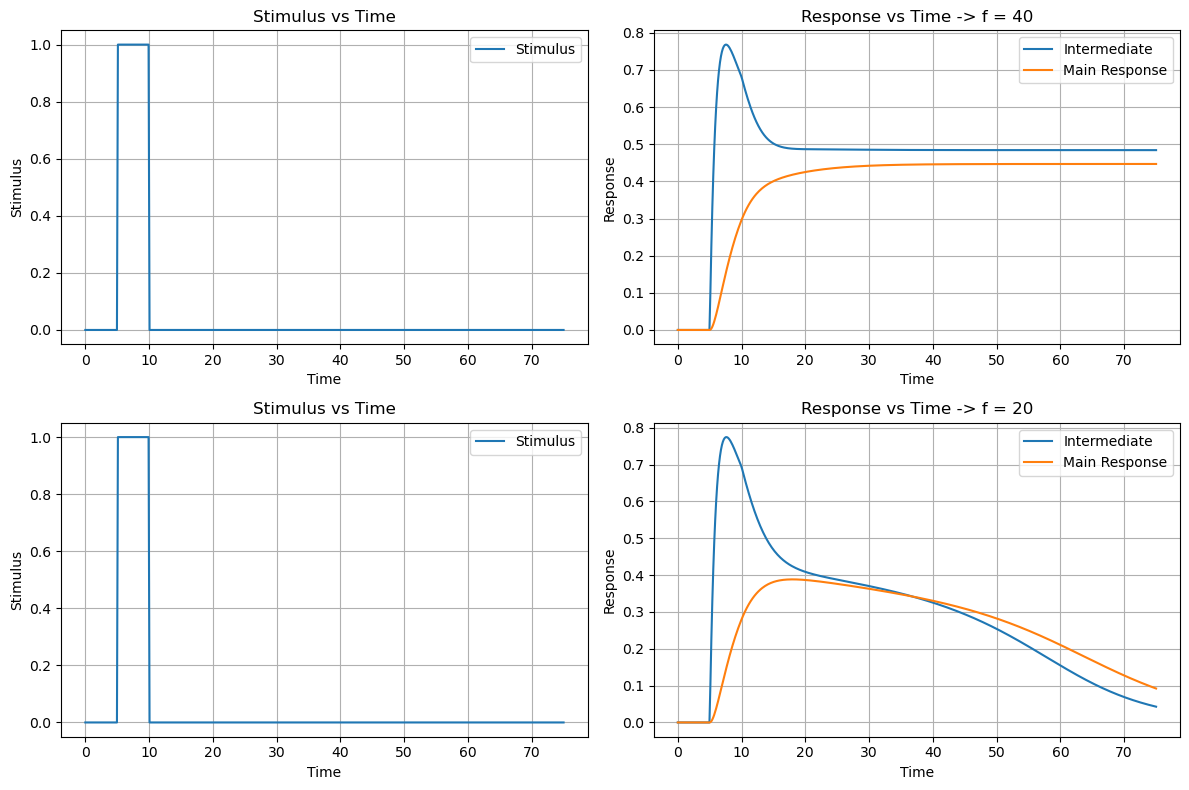

In [9]:
def model(Y, t, A_total, f, n, K, ky1, kz, ky2):
    y, z = Y
    if t < 5 or t > 10:
        stimulus = 0
    else:
        stimulus = 1
    dydt = stimulus * (A_total - y - z) + f * z**n * (A_total - y - z) / (K**n + z**n) - ky1 * y
    dzdt = ky2 * y - kz * z
    return [dydt, dzdt]

A_total1 = 1.0
f1 = 40
n1 = 5
K1 = 1.0
ky1 = 0.1
kz = 0.13
ky2 = 0.12

t1 = np.linspace(0, 75, 500)

Y0_1 = [0.0, 0.0]

stimulus1 = np.zeros_like(t1)
stimulus1[(t1 >= 5) & (t1 <= 10)] = 1
sol1 = odeint(model, Y0_1, t1, args=(A_total1, f1, n1, K1, ky1, kz, ky2))

A_total2 = 1.0
f2 = 20
n2 = 5
K2 = 1.0
ky1 = 0.1
kz = 0.12
ky2 = 0.11

t2 = np.linspace(0, 75, 500)

Y0_2 = [0.0, 0.0]

stimulus2 = np.zeros_like(t2)
stimulus2[(t2 >= 5) & (t2 <= 10)] = 1
sol2 = odeint(model, Y0_2, t2, args=(A_total2, f2, n2, K2, ky1, kz, ky2))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(t1, stimulus1, label='Stimulus')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Stimulus')
axes[0, 0].set_title('Stimulus vs Time')
axes[0, 0].grid(True)
axes[0, 0].legend()

axes[0, 1].plot(t1, sol1[:, 0], label='Intermediate')
axes[0, 1].plot(t1, sol1[:, 1], label='Main Response')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Response')
axes[0, 1].set_title('Response vs Time -> f = 40')
axes[0, 1].grid(True)
axes[0, 1].legend()

axes[1, 0].plot(t2, stimulus2, label='Stimulus')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Stimulus')
axes[1, 0].set_title('Stimulus vs Time')
axes[1, 0].grid(True)
axes[1, 0].legend()

axes[1, 1].plot(t2, sol2[:, 0], label='Intermediate')
axes[1, 1].plot(t2, sol2[:, 1], label='Main Response')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Response')
axes[1, 1].set_title('Response vs Time -> f = 20')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

As can be seen from the plots, we again get irreversibility if the feedback strength is strong enough. If the feedback is weak, we can see that the Response dies down with time.

This is similar to what we had with the simpler model.

However, we also notice that it takes longer for our Response to reach its steady state. This is expected as we have additional components in our system now. These add an element of delay, which can be leveraged by the system.

### Amplification as well as Irreversibility

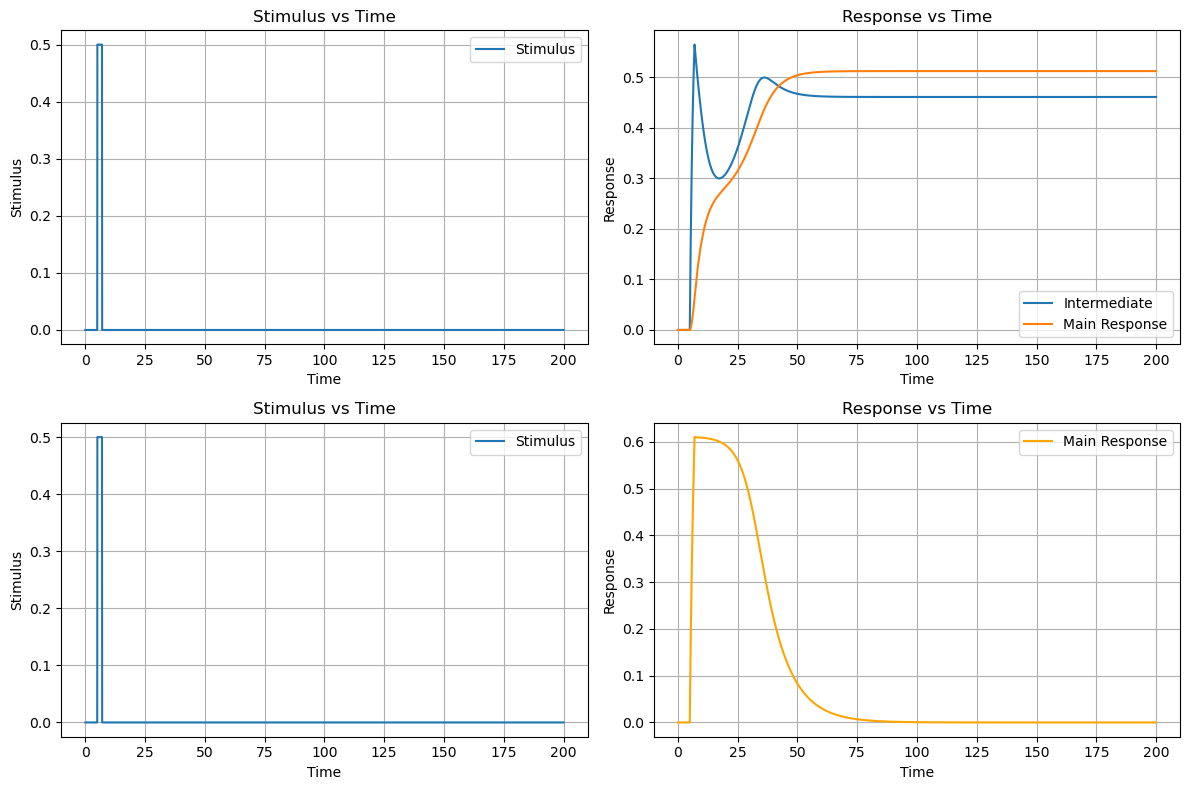

In [10]:
def model1(Y, t, A_total, f, n, K, ky1, kz, ky2):
    y, z = Y
    if t < 5 or t > 7:
        stimulus = 0
    else:
        stimulus = 0.5
    dydt = stimulus * (A_total - y - z) + f * z**n * (A_total - y - z) / (K**n + z**n) - ky1 * y
    dzdt = ky2 * y - kz * z
    return [dydt, dzdt]

def model2(A, t, A_total, f, n, K, k_inact):
    if t < 5 or t > 7:
        stimulus = 0
    else:
        stimulus = 0.5
    dAdt = stimulus * (A_total - A) + f * (A**n / (K**n + A**n)) * (A_total - A) - k_inact * A
    return dAdt

A_total1 = 1.0
f1 = 50
n1 = 5
K1 = 1.0
ky1 = 0.1
kz = 0.09
ky2 = 0.1

A_total2 = 1.0
f2 = 2
n2 = 5
K2 = 1.0
k_inact2 = 0.1

t = np.linspace(0, 200, 10000)

Y0 = [0.0, 0.0]

A0 = np.array([0.0])

stimulus1 = np.zeros_like(t)
stimulus1[(t >= 5) & (t <= 7)] = 0.5
sol1 = odeint(model1, Y0, t, args=(A_total1, f1, n1, K1, ky1, kz, ky2))

stimulus2 = np.zeros_like(t)
stimulus2[(t >= 5) & (t <= 7)] = 0.5
sol2 = odeint(model2, A0, t, args=(A_total2, f2, n2, K2, k_inact2))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(t, stimulus1, label='Stimulus')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Stimulus')
axes[0, 0].set_title('Stimulus vs Time')
axes[0, 0].grid(True)
axes[0, 0].legend()

axes[0, 1].plot(t, sol1[:, 0], label='Intermediate')
axes[0, 1].plot(t, sol1[:, 1], label='Main Response')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Response')
axes[0, 1].set_title('Response vs Time')
axes[0, 1].grid(True)
axes[0, 1].legend()

axes[1, 0].plot(t, stimulus2, label='Stimulus')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Stimulus')
axes[1, 0].set_title('Stimulus vs Time')
axes[1, 0].grid(True)
axes[1, 0].legend()

axes[1, 1].plot(t, sol2[:, 0], label='Main Response', color='orange')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Response')
axes[1, 1].set_title('Response vs Time')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Here, we have our new model vs our previous model

We give a very short pulse for the Stimulus and also keep its concentration till 0.5. This means there is a weaker Stimulus than before.

We notice that in the second plot, which is our initial simple model, the Response is not able to reach its final irreversible steady state and dies down.

However, in our new model, an interesting thing happens. The intermediate increases sharply initially on applying Stimulus. Now this starts to increase our Response. Now when our Stimulus is turned off, the intermediate starts to decrease. However, this process takes time, and that is sufficient enough to help our main Response to cross into the Irreversible steady state. This in turn amplifies our feedback loop and they both reach steady states.

Hence we can see, in our new complex multi-component model, the intermediate helps to amplify the Stimulus and lead to Irreversibility, which would not have happened otherwise.